# Leveraging Multimodal Inputs for Information Extraction Task Using a Third-Party Large Language Model

<!-- <h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
<li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-2">Prerequisites</a></span></li>
<li><span><a href="#Imports" data-toc-modified-id="Imports-3">Imports</a></span></li>
<li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-4">Data preparation</a></span></li>
<li><span><a href="#EntityRecognizer-model" data-toc-modified-id="EntityRecognizer-model-5">EntityRecognizer model</a></span></li>
<ul class="toc-item">
<li><span><a href="#Finding-optimum-learning-rate" data-toc-modified-id="Finding-optimum-learning-rate-5.1">Finding optimum learning rate</a></span>    
<li><span><a href="#Model-training" data-toc-modified-id="Model-training-5.2">Model training</a></span>
<li><span><a href="#Evaluate-model-performance" data-toc-modified-id="Evaluate-model-performance-5.3">Evaluate model performance</a></span>
<li><span><a href="#Validate-results" data-toc-modified-id="Validate-results-5.4">Validate results</a></span></li>
<li><span><a href="#Save-and-load-trained-models" data-toc-modified-id="Save-and-load-trained-models-5.5">Save and load trained models</a></span></li>
</ul>
<li><span><a href="#Model-inference" data-toc-modified-id="Model-inference-6">Model inference</a></span></li>
<li><span><a href="#Publishing-the-results-as-feature-layer" data-toc-modified-id="Publishing-the-results-as-feature-layer-7">Publishing the results as feature layer</a></span></li>
<li><span><a href="#Visualize-crime-incident-on-map" data-toc-modified-id="Visualize-crime-incident-on-map- 8">Visualize crime incident on map</a></span></li>
<li><span><a href="#Create-a-hot-spot-map-of-crime-densities" data-toc-modified-id="Create-a-hot-spot-map-of-crime-densities-9">Create a hot spot map of crime densities</a></span></li>
<li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10">Conclusion</a></span></li>
<li><span><a href="#References" data-toc-modified-id="References-11">References</a></span></li>
</ul></div> -->

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
<ul class="toc-item">
  <li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li>
  <li><span><a href="#Dataset" data-toc-modified-id="Dataset-2">Dataset</a></span></li>
  <li><span><a href="#Capability-Demonstration" data-toc-modified-id="Capability-Demonstration-3">Capability Demonstration</a></span></li>
  <li><span><a href="#Prerequisites" data-toc-modified-id="Prerequisites-4">Prerequisites</a></span></li>
  <li><span><a href="#Create-the-Third-Party-Deep-Learning-Package" data-toc-modified-id="Create-the-Third-Party-Deep-Learning-Package-5">Create the Third-Party Deep Learning Package (.dlpk)</a></span></li>
  <ul class="toc-item">
    <li><span><a href="#Components-of-the-Third-Party-DLPK" data-toc-modified-id="Components-of-the-Third-Party-DLPK-5.1">Components of the Third-Party Deep Learning Package (.dlpk)</a></span></li>
  </ul>
  <li><span><a href="#ESRI-Model-Definition" data-toc-modified-id="ESRI-Model-Definition-6">ESRI Model Definition (.emd) file</a></span></li>
  <ul class="toc-item">
    <li><span><a href="#Create-Esri-Model-Definition" data-toc-modified-id="Create-Esri-Model-Definition-6.1">Create an Esri Model Definition (.emd) File</a></span></li>
  </ul>
  <li><span><a href="#Custom-Python-NLP-Function" data-toc-modified-id="Custom-Python-NLP-Function-7">Custom Python NLP Function</a></span></li>
  <ul class="toc-item">
    <li><span><a href="#Define-init-function" data-toc-modified-id="Define-init-function-7.1">Define the __init__ function</a></span></li>
    <li><span><a href="#Define-initialize-function" data-toc-modified-id="Define-initialize-function-7.2">Define initialize function</a></span></li>
    <li><span><a href="#Define-getParameterInfo-function" data-toc-modified-id="Define-getParameterInfo-function-7.3">Define the getParameterInfo function</a></span></li>
    <li><span><a href="#Define-getConfiguration-function" data-toc-modified-id="Define-getConfiguration-function-7.4">Define the getConfiguration function</a></span></li>
    <li><span><a href="#Define-predict-function" data-toc-modified-id="Define-predict-function-7.5">Define the predict function</a></span></li>
  </ul>
  <li><span><a href="#Create-AI-Service-Connection-File" data-toc-modified-id="Create-AI-Service-Connection-File-8">Create AI Service Connection File</a></span></li>
  <li><span><a href="#Zip-the-DLPK" data-toc-modified-id="Zip-the-DLPK-9">Zip the DLPK</a></span></li>
  <li><span><a href="#Run-the-Process-Text-Tool" data-toc-modified-id="Run-the-Process-Text-Tool-10">Run the Process Text Using AI Model tool</a></span></li>
  <li><span><a href="#Results" data-toc-modified-id="Results-11">Results</a></span></li>
  <li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12">Conclusion</a></span></li>
</ul>
</div>


# Introduction

As businesses increasingly digitize operations, vast amounts of transactional data—such as sales receipts—are often stored as scanned images or photos. Extracting meaningful, structured information from these image-based documents can support a variety of analytical and operational workflows, such as sales tracking, sales management, and customer insights.

Recent advancements in large language models (LLMs) have opened new possibilities for interpreting and extracting information from such inputs with greater accuracy and flexibility. The **GeoAI toolbox** in ArcGIS Pro supports integration of third-party language models, allowing users to process and analyze text using external AI services. Custom third-party models can be wrapped in ESRI Deep Learning Package (.dlpk) files and used within GeoAI tools and the arcgis.learn API. In this sample, we demonstrate how one such model—**GPT-4o** from OpenAI— used with the **Process Text Using AI Model** tool to extract relevant entities from receipt images. Third-party model support in **ArcGIS Pro** and the `arcgis.learn` API allows users to bring in AI models—whether hosted by providers like OpenAI, Azure, etc., built from open-source code, or fine-tuned for a specific task—to enhance natural language processing directly within ArcGIS workflows.



For this use case, we use a set of sales receipt images and perform entity extraction to identify key pieces of information. The extracted entities can be used for downstream tasks such as sales analytics, customer profiling, inventory management, or tax auditing. The model will extracts the following entities:

- Sale Date  
- Customer Name  
- Product  
- Quantity  
- Unit Price  
- Total Amount  
- Tax Rate  
- Payment Method

This use case highlights how advanced AI models can streamline the transformation of unstructured receipt data into structured, analysis-ready datasets within the ArcGIS ecosystem.


# Dataset 

For this use case, we use a sample set of images of printed sales receipts from various retail outlets such as Walmart, Costco Wholesale, etc.


# Capability Demonstration

- Out-of-the-box use of pre-trained model
- Minimal or no annotation required
- Comparable accuracy


# Prerequisites
- Refer to the section **"Install deep learning dependencies of arcgis.learn module"** [on this page](https://developers.arcgis.com/python/guide/install-and-set-up/#Install-deep-learning-dependencies) for detailed documentation on installation of the dependencies.
- To learn more about how to create and integrate third-party model, refer [Use third party language models with ArcGIS](https://developers.arcgis.com/python/latest/guide/use-third-party-language-models-with-arcgis/)

# Create the Third-Party Deep Learning Package (.dlpk)

The first step in using a third-party language model is to prepare a Deep Learning Package file (`.dlpk`). This package includes your custom NLP Python function to interact with external models, along with an Esri Model Definition (`.emd`) file. In this use case, we use a third-party hosted model—**GPT-4o**—to extract key entities from scanned sales receipt images. Please note that if you use a web-hosted LLM, the data processed will be sent to the LLM provider. Use these models only if you trust their source.

### Components of the Third-Party Deep Learning Package (.dlpk)

- An Esri Model Definition file (`LLMEntityExtractor.emd`).
- A custom Python NLP function (e.g., `MyLLMEntityExtractor.py`) that defines how to interact with the GPT-4o API and parse the results.



The first component of a third-party Deep Learning Package (.dlpk) is an Esri Model Definition (.emd) file. Let's create the .emd file:

# ESRI Model Definition (.emd) file

### Create an Esri Model Definition (.emd) File

The Esri Model Definition (`.emd`) file contains both required and optional keys necessary for executing the model. A valid `.emd` file for use with the **Process Text Using AI Model** tool must include the following essential keys:

1. **`InferenceFunction`**: Specifies the name of the module that defines the custom NLP function.  
2. **`ModelType`**: Indicates the type of task being performed.

Additional keys may be included at the discretion of the model extension author. In this case, we’ve added the system prompt name under the key **`sys_prompt`**.


In [ ]:
{
    "InferenceFunction": "MyLLMEntityExtractor.py",
    "ModelType": "LLM",
    "sys_prompt": """Extract the following fields from each sentence:
                            Sale Date
                            Customer Name
                            Product
                            Quantity
                            Unit Price
                            Total Amount
                            Tax Rate
                            Payment Method
                            Output the result in JSON format for each sentence.
                            Example Sentence:
                            "Today, Diana Fisher acquired 6 Monitor(s) at Traders joe, Greenvil ave, paying a total of 104580 INR. The payment was made via Cash."
                            Expected Output:
                            {
                            "Sale Date": "10-04-2024",
                            "Customer Name": "Diana Fisher",
                            "Products": "Monitor",
                            "Total Amount": 104580,
                            "Payment Method": "Cash",
                            "Location": "Traders joe, Greenvil ave"
                            "Store Name": "Traders joe",
                            }"""
}

Once the `.emd` file is created, the next step is to create a custom Python NLP function.  

# Custom Python NLP Function

To integrate with ArcGIS Pro, the model logic must be encapsulated in a Python class that implements the following required methods:

- `__init__`
- `getParameterInfo`
- `initialize`
- `getConfiguration`
- `predict`

We'll now create a custom NLP function to extract the following entities from scanned sales receipt images:

- Sale Date  
- Customer Name  
- Product  
- Quantity  
- Unit Price  
- Total Amount  
- Tax Rate  
- Payment Method

To accomplish this, we’ll use the pre-trained **GPT-4o** large language model from OpenAI. The input will consist of images of printed sales receipts containing the relevant information, along with a well-defined text prompt to the LLM. The model will return structured data for the above specified entities.

### Imports

In [ ]:
import ast
from math import e
import arcpy
import json
import base64
import pandas as pd
import requests
from pydantic import BaseModel
from typing import Optional, List, Dict, Tuple
from arcgis.features import FeatureSet
from concurrent.futures import ThreadPoolExecutor
import keyring
from arcgis.learn import AIServiceConnection


### Define the ```__init__``` function

The `__init__` method initializes instance variables such as `name`, `description`, and other attributes essential for the NLP function.

In [ ]:
def __init__(self, **kwargs):
    self.name = "GPT-based NER for Sales"
    self.description = "Named Entity Recognition using GPT for extracting sales receipt information from the scanned images" 

### Define ```initialize``` function
The initialize method is called at the start of the custom Python NLP function, within this function we will set up the necessary variables. It accepts two parameters via `kwargs`:

#### Parameters in `kwargs`
- **`model`**: The path to the ESRI Model Definition (.emd) file.
- **`device`**: The name of the device (either GPU or CPU), which is particularly important for on-premises models.

`initialize` reads the ESRI Model Definition (.emd) file and configures the essential variables needed for inference.


In [ ]:
def initialize(self, **kwargs):
    json_file = kwargs['model']
    with open(json_file, 'r') as f:
        self.json_info = json.load(f)
    # access the predefined system propmpt from the EMD file
    self.SYSTEM_PROMPT = json_info['sys_prompt']

### Define the ```getParameterInfo``` function

This function is designed to collect parameters from the user through the GeoAI tools. For our use case, it gathers the text prompt used to instruct the language model on which entities to extract from the input receipt text, as well as the connection file required to authenticate with the third-party model provider. Refer to the section [getParameterInfo](https://developers.arcgis.com/python/latest/guide/use-third-party-language-models-with-arcgis/) to get a detail explanation of the ```getParameterInfo``` function.

In [ ]:
def getParameterInfo(self, **kwargs):
        params = [
            {
                "name": "prompt",
                "dataType": "string",
                "required": True,
                "displayName": "Prompt",
                "description": "Prompt",
                "value": """Extract the defined entities from the input text."""
            },
            {
                "name": "ai_connection_file",
                "dataType": "string",
                "required": True,
                "displayName": "Path of the connection file",
                "description": "Path of the connection file",
                "value": "",
            },
        ]
        return params

**Returns:**  
The method returns a list of dictionaries, each representing a parameter required by the custom NLP model.

**Each dictionary contains the following key attributes:**

- `name`: A string identifier for the parameter.
- `dataType`: The type of data the parameter accepts (e.g., `string`, `boolean`, `list`).
- `value`: The default value for the parameter.
- `required`: A boolean indicating whether the parameter is required.
- `displayName`: A user-friendly name shown in the GeoAI tool interface.
- `domain`: (Optional) A set of allowed values for the parameter, if applicable.
- `description`: A detailed explanation of what the parameter does and how it is used.


### Define the ```getConfiguration``` function

The `getConfiguration` method sets up and manages the parameters required by the NLP function. It receives keyword arguments (`kwargs`) that contain the values provided by the user—either through the GeoAI tool interface or programmatically.

This method is responsible for:
- Extracting user-specified values (e.g., prompt, AI connection file path).
- Storing these values in class-level variables or a configuration dictionary.
- Controlling how the model processes the input and generates the output based on the updated parameters.

By configuring these parameters, the method ensures that the function runs with the correct context and settings during inference.


For our use case, we are using a large language model (LLM) provided by an external AI service—**GPT-4o from OpenAI**. To enable communication between our custom Python NLP function and the OpenAI endpoint, we need a connection file. You can refer to the *[Create AI Service Connection File](#create-ai-service-connection-file)* section for instructions on how to create one.

This connection file securely stores the required credentials, which will be retrieved and used to authenticate and initialize the third-party model. These saved credentials will be accessed from the connection file and set within the current class context in the following function.


In [ ]:
def getConfiguration(self, **kwargs):
    # Get ai_connection_file parameter value     
    connection_file_path = kwargs.get("ai_connection_file", None)
    # Read the connection file using AIServiceConnection class inside arcgis.learn
    conn = AIServiceConnection(connection_file_path)
    # Set the  values
    conn_dict = conn.get_dict()
    # self.API_KEY = conn_dict['serviceProviderProperties']['token']
    # self.model = conn_dict['serviceProviderProperties']['model']

    # Get prompt parameter value 
    self.prompt_txt = kwargs.get("prompt", "")
    self.prompt = f"{self.SYSTEM_PROMPT}\n\n{self.prompt_txt}"
    return kwargs

### Define the ```predict``` function

In [ ]:
def predict(self, feature_set, **kwargs):
    openai.api_key = self.API_KEY
    field = kwargs["input_field"][0]
    image_list = feature_set.df[field].to_list()
    payload = []
    features_list = []
    for image in image_list:
            base64_image = encode_image(image)
            url = f"data:image/jpg;base64,{base64_image}"
            payload = {
                "messages": [
                    {"role": "system", "content": self.prompt},
                    {
                        "role": "user",
                        "content": [
                            {
                                "type": "image_url",
                                "image_url": {
                                    "url": f"data:image/jpeg;base64,{base64_image}"
                                },
                            },
                        ],
                    },
                ],
                "temperature": 0.2,
                "response_format" : { "type": "json_object" }
            }
            payload = json.dumps(payload)
            
            response = openai.ChatCompletion.create(
                            model=self.model,
                            messages=payload["messages"],
                            temperature=0.2
                        )

            output = response.json()["choices"][0]["message"]["content"]
            output = json.loads(output)
            output = {k:v if not isinstance(v, list) else str(v) for k,v in output.items() }
            attribute_dict = {"inputpath": image}
            attribute_dict.update(output)
            features_list.append(
                {
                    "attributes": attribute_dict
                }
            )
        all_fields = []
        for field in entities_to_extract:
            all_fields.append({"name": f"{field}", "type": "esriFieldTypeString"})
        all_fields.append({"name": "inputpath", "type": "esriFieldTypeString"})
        feature_dict = {
            "fields": all_fields,
            "geometryType": "",
            "features": features_list,
        }
        return FeatureSet.from_dict(feature_dict)

# Create AI Service Connection File

To establish a connection between the Python NLP function and the hosted AI service, a connection file is required. This file can be created using the ```Create AI Service Connection File``` tool, located in the ``Data Management`` toolbox under the ``General`` toolset. The tool securely stores access credentials and configuration settings in an encoded .ais file, eliminating the need for repeated manual entry. It supports multiple cloud-based AI providers and simplifies authentication across tasks while minimizing the risk of errors. For more details, refer to the [Create AI Service Connection File](https://pro.arcgis.com/en/pro-app/latest/tool-reference/data-management/create-ai-service-connection-file.htm) tool documentation.

Let’s create a connection file for GPT-4o provided by OpenAI, along with a few other required configurations for our use case.

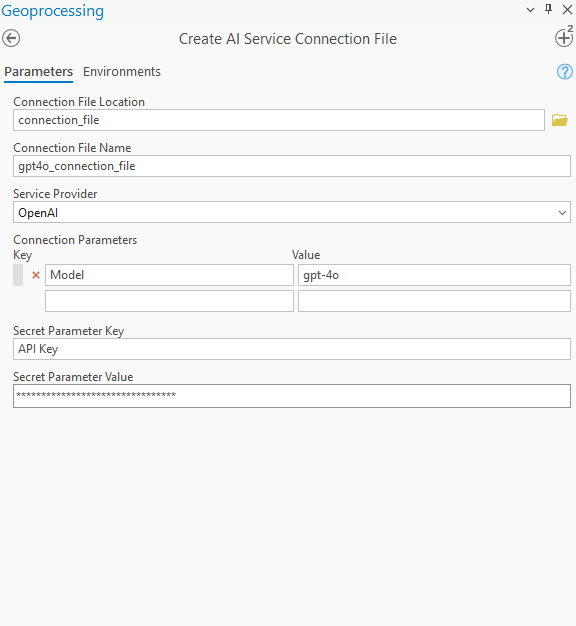

Once the tool finishes its execution, it will save the connection file in the specified location with the provided name.

## Zip the DLPK

### Organize the Files

Follow these steps to prepare the `.dlpk` package:

- **Create a Folder**:  
  Create a folder and include the custom NLP function file (e.g., `LLMEntityExtractor.py`) and the Esri `.emd` file (e.g., `LLMEntityExtractor.emd`).  
  The name of the folder must match the name of the `.emd` file.

  **Example folder structure:**
  
```
LLMEntityExtractor/
├── MyLLMEntityExtractor.py
└── LLMEntityExtractor.emd
```


- **Zip the Folder**:  
Compress the folder into a ZIP archive.  
Rename the `.zip` file to match the `.emd` file name, but with the `.dlpk` extension.

**Example final file name:**

```LLMEntityExtractor.dlpk```

This `.dlpk` file is now ready for use with the ```Process Text Using AI Model``` inside ArcGIS Pro.

# Run the Process Text Using AI Model tool

Here are the sample images for this use case

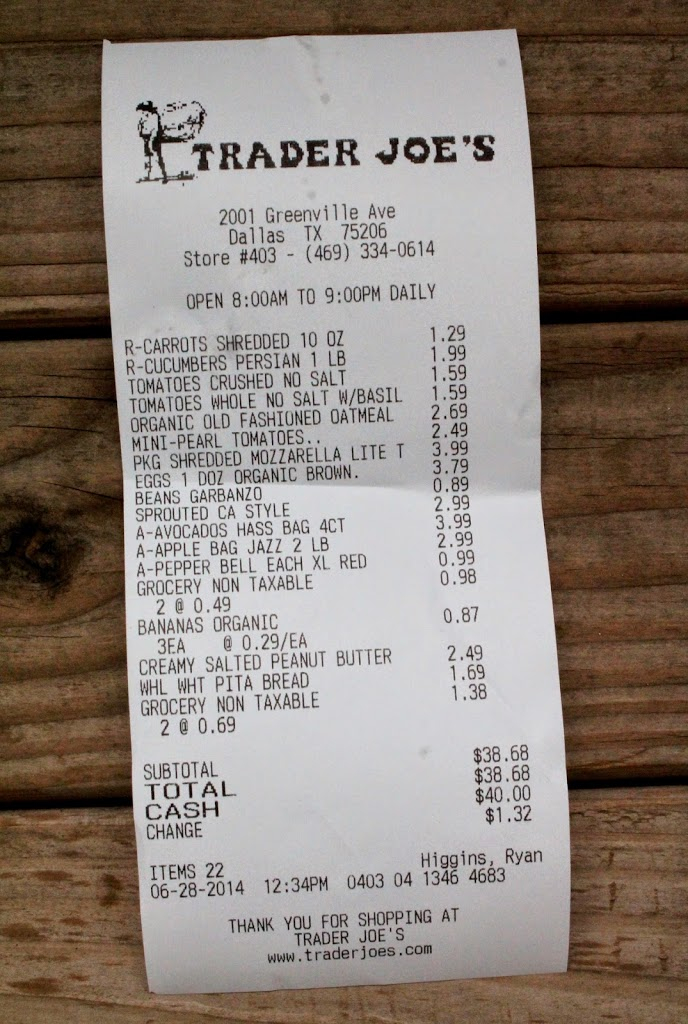 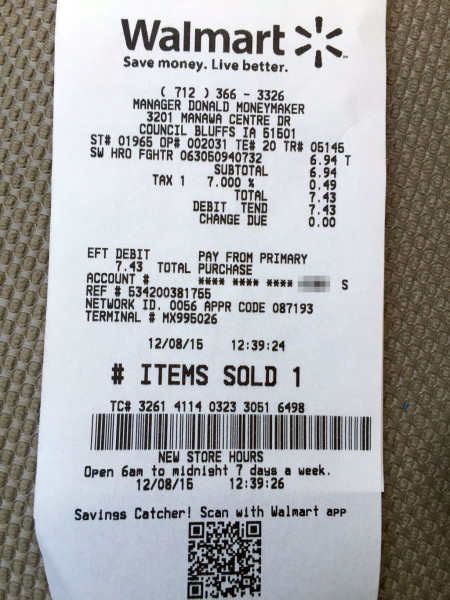 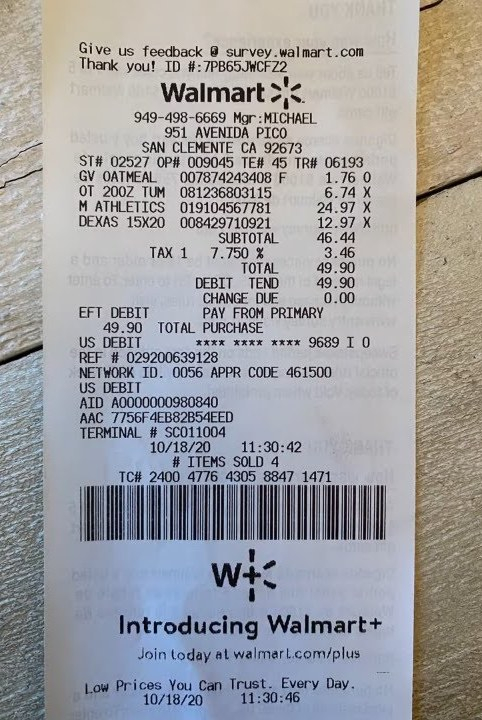

**Run the tool with the desired parameters:**

1. **Input Layer or Table** – The folder containing the input images. → `Receipts`  
2. **Input Model Definition File** – The deep learning package (.dplk) defining the entity extraction. → `LLMEntityExtractor.dplk`  
3. **Output Layer or Table** – The table name where extracted results will be saved. → `Receipts_ProcessText_0`
4. **Model Arguments** -
    - **Prompt** – Instructions to the model specifying which fields to extract from text. →  
       `Extract the following fields from each sentence: Sale Date, Customer Name, Product, Quantity, Unit Price, Total Amount, Tax Rate, Payment Method. Output the result in JSON format for each record`
   - **AI Connection File** – Configuration file for connecting to the AI/LLM model server. → `connection_file_4o.ais`  
6. **Location Zone** – Regional setting to guide formatting or context, e.g., date formats. → `US`  
7. **Input Locator** – Geocoding service to interpret or normalize addresses. →  `Locator`



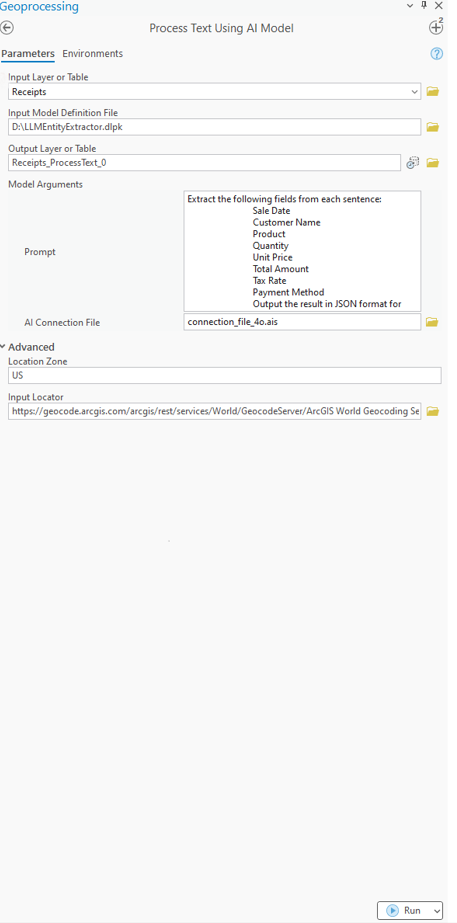

# Results

**After running the tool here are the extracted results:**

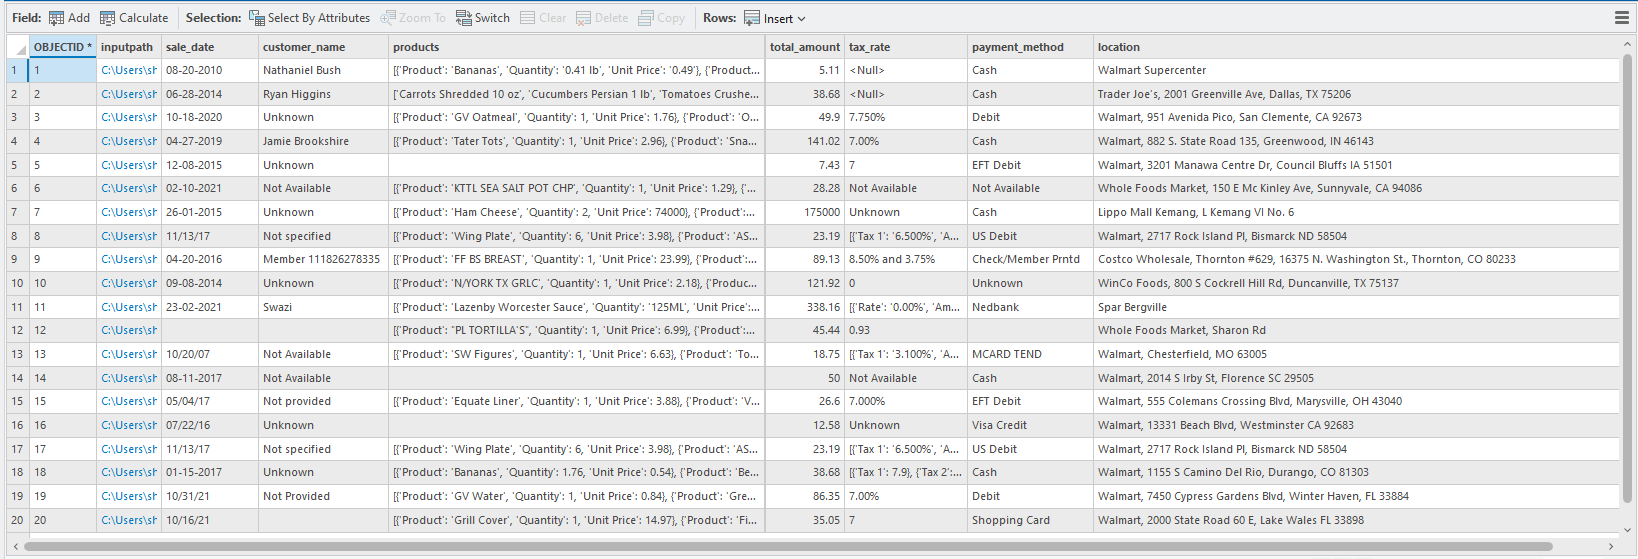

**You can choose to geocode the location on to the map**

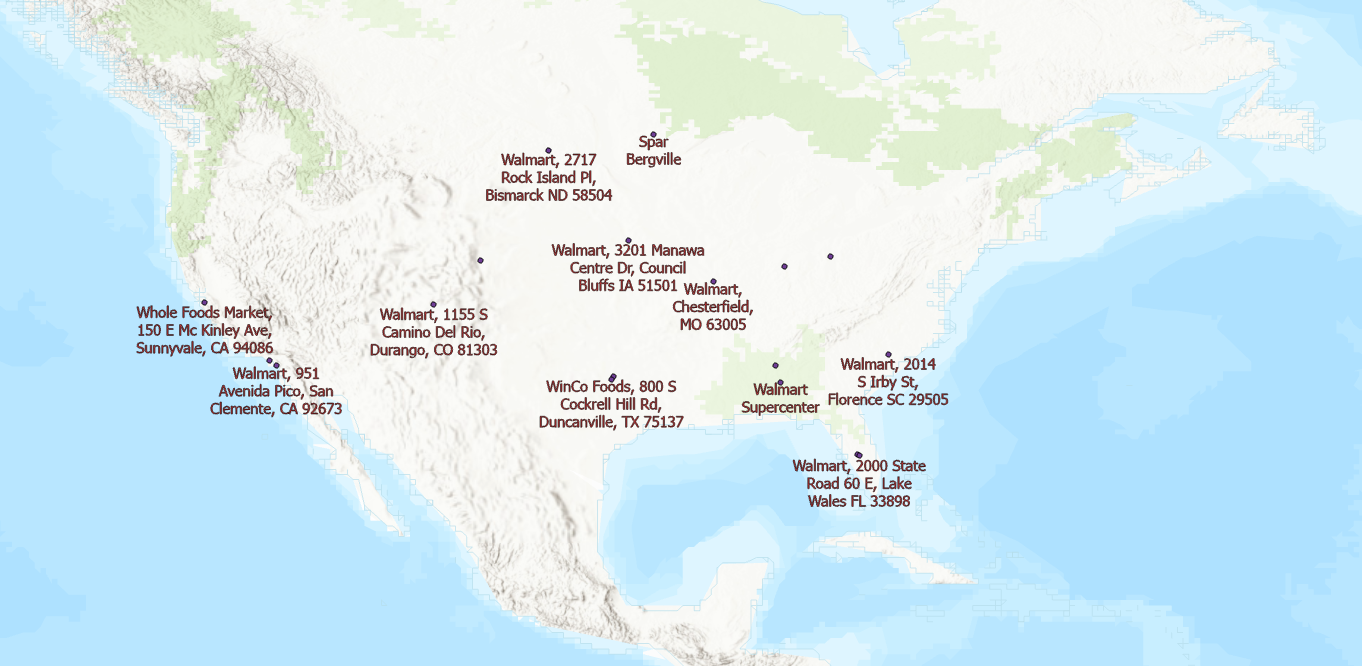

# Conclusion

This guide demonstrates how powerful AI models like GPT-4o can be seamlessly integrated into ArcGIS Pro through the Process text Using AI Model tool to extract structured information from unstructured receipt images. By using the "Process Text Using AI Model" tool and a custom LLM wrapped in a Deep Learning Package (.dlpk), users can automate the extraction of key entities such as sale date, customer name, product details, and payment method.

This approach reduces the need for manual data entry or annotation while delivering high-quality, analysis-ready outputs that can support a range of GIS and business workflows—including sales analytics, inventory tracking, and customer insights. With built-in support for third-party AI services, ArcGIS Pro enables users to bring the latest in NLP and machine learning directly into their geospatial data pipelines.

